### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [1]:
import pandas as pd

df = pd.read_csv('Fake_Real_Data.csv')

print(df.shape)
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
df['label'].value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [3]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num'] = df['label'].map({'Fake':0, 'Real':1})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


### **Modelling without Pre-processing Text data**

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [5]:
print(x_train.shape, x_test.shape)

(7920,) (1980,)


In [6]:
print(y_train.shape, y_test.shape)

(7920,) (1980,)


**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf1 = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range=(1,3))),
    ('KNN', (KNeighborsClassifier(n_neighbors=10, metric='euclidean')))
])

clf1.fit(x_train, y_train)

y_pred1 = clf1.predict(x_test)

print("Using Kneighbors Classifier with metric 'euclidean' distance! \n")
print(classification_report(y_test, y_pred1))

Using Kneighbors Classifier with metric 'euclidean' distance! 

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.


In [9]:
clf2 = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range=(1,3))),
    ('KNN', (KNeighborsClassifier(n_neighbors=10, metric='cosine')))
])

clf2.fit(x_train, y_train)

y_pred2 = clf2.predict(x_test)

print("Using Kneighbors Classifier with metric 'cosine' distance! \n")
print(classification_report(y_test, y_pred2))

Using Kneighbors Classifier with metric 'cosine' distance! 

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf3 = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range=(3,3))),
    ('random_forest', RandomForestClassifier())
])

clf3.fit(x_train, y_train)

y_pred3 = clf3.predict(x_test)

print("Using Random Forest Classifier! \n")
print(classification_report(y_test, y_pred3))

Using Random Forest Classifier! 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- print the classification report.


In [11]:
from sklearn.naive_bayes import MultinomialNB

clf4 = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1,2))),
    ('multinomial_nb', MultinomialNB(alpha = 0.75))
])

clf4.fit(x_train, y_train)

y_pred4 = clf4.predict(x_test)

print("Using Multinomial Naive Bayes! \n")
print(classification_report(y_test, y_pred4))

Using Multinomial Naive Bayes! 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [12]:
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [13]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [14]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


**Build a model with pre processed text**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [16]:
clf5 = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range=(3,3))),
    ('random_forest', RandomForestClassifier())
])

clf5.fit(x_train, y_train)

y_pred5 = clf5.predict(x_test)

print("Using Random Forest Classifier! \n")
print(classification_report(y_test, y_pred5))

Using Random Forest Classifier! 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



**Attempt2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, Bigram, and trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [17]:
clf6 = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range=(1,3))),
    ('random_forest', RandomForestClassifier())
])

clf6.fit(x_train, y_train)

y_pred6 = clf6.predict(x_test)

print("Using Random Forest Classifier! \n")
print(classification_report(y_test, y_pred6))

Using Random Forest Classifier! 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred6)
cm

array([[999,   1],
       [  3, 977]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

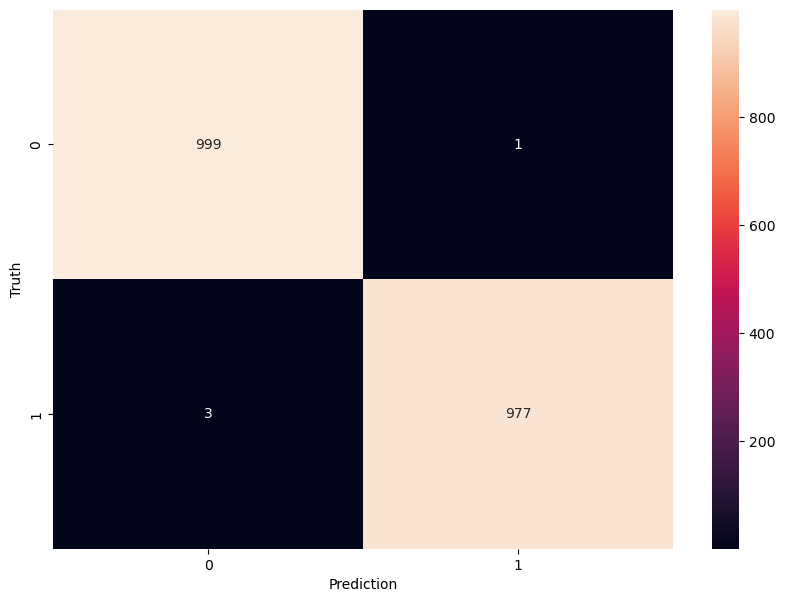

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')